## Step 6

In [1]:
import pandas as pd
import sqlite3
import numpy as np
engine = sqlite3.connect('HW1_DB')

airports_df = pd.read_sql('select * from airports',engine)
airlines_df = pd.read_sql('select * from airlines',engine)
routes_df = pd.read_sql('select * from routes',engine)

## 6.1

In [2]:
import requests
import io
from io import StringIO

aug_response = requests.get('http://big.dataanalytics.education/data/Flights-Aug-2016.csv')
sep_response = requests.get('http://big.dataanalytics.education/data/Flights-Sep-2016.csv')
oct_response = requests.get('http://big.dataanalytics.education/data/Flights-Oct-2016.csv')

In [3]:
aug_csv = io.StringIO(aug_response.text)
aug_flights_df = pd.read_csv(aug_csv, usecols=['Year', 'Month', 'DayofMonth', 'Carrier', 'FlightNum', 'Origin', 'Dest',
'DepTime', 'ArrTime', 'ArrDelayMinutes','Cancelled'])
aug_flights_df.to_sql('flights', engine, index=False, if_exists='replace')

In [4]:
sep_csv = io.StringIO(sep_response.text)
sep_flights_df = pd.read_csv(sep_csv, usecols=['Year', 'Month', 'DayofMonth', 'Carrier', 'FlightNum', 'Origin', 'Dest',
'DepTime', 'ArrTime', 'ArrDelayMinutes','Cancelled'])
sep_flights_df.to_sql('flights', engine, index=False, if_exists='append')

In [5]:
oct_csv = io.StringIO(oct_response.text)
oct_flights_df = pd.read_csv(oct_csv, usecols=['Year', 'Month', 'DayofMonth', 'Carrier', 'FlightNum', 'Origin', 'Dest',
'DepTime', 'ArrTime', 'ArrDelayMinutes','Cancelled'])
oct_flights_df.to_sql('flights', engine, index=False, if_exists='append')

In [6]:
aug_flights_df.head()

,Year,Month,DayofMonth,Carrier,FlightNum,Origin,Dest,DepTime,ArrTime,ArrDelayMinutes,Cancelled
0,2016,8,1,AA,1,BOS,JFK,557.0,711.0,0.0,0.0
1,2016,8,2,AA,1,BOS,JFK,558.0,704.0,0.0,0.0
2,2016,8,3,AA,1,BOS,JFK,552.0,704.0,0.0,0.0
3,2016,8,4,AA,1,BOS,JFK,839.0,1003.0,172.0,0.0
4,2016,8,5,AA,1,BOS,JFK,619.0,721.0,10.0,0.0


In [7]:
df = pd.read_sql(sql="select count(*) from flights", con=engine)

## Step 6.1

In [8]:
int(df.ix[0])

1425851

## Step 6.2

## Step 6.2.1

In [9]:
output_df = pd.read_sql(sql = "SELECT IATAICAOAirline, IATAICAODestinationAirport, COUNT(*) AS count FROM routes JOIN flights ON IATAICAOAirline = Carrier AND IATAICAODestinationAirport = Dest AND IATAICAOSourceAirport = Origin GROUP BY IATAICAOAirline, IATAICAODestinationAirport ORDER BY IATAICAOAirline, IATAICAODestinationAirport LIMIT 60", con=engine)

In [10]:
output_df

,IATAICAOAirline,IATAICAODestinationAirport,count
0,AA,ABQ,446
1,AA,ALB,255
2,AA,AMA,70
3,AA,ANC,44
4,AA,ATL,2832
5,AA,AUS,2265
6,AA,BDL,1015
7,AA,BNA,1418
8,AA,BOI,187
9,AA,BOS,7194


## Step 6.2.2

In [11]:
delay_df_tmp = pd.read_sql(sql = "SELECT IATAICAOAirline, IATAICAODestinationAirport, COUNT(*) AS count FROM flights JOIN routes ON IATAICAOAirline = Carrier AND IATAICAODestinationAirport = Dest AND IATAICAOSourceAirport = Origin WHERE ArrDelayMinutes>=30 OR Cancelled =1 GROUP BY IATAICAOAirline, IATAICAODestinationAirport ORDER BY Carrier, Dest LIMIT 60",con=engine).set_index(['IATAICAOAirline','IATAICAODestinationAirport'])

In [12]:
delay_df_tmp

count
IATAICAOAirline IATAICAODestinationAirport       
AA              ABQ                            67
                ALB                            15
                AMA                             9
                ANC                             2
                ATL                           297
                AUS                           292
                BDL                           134
                BNA                           139
                BOI                            15
                BOS                          1115
                BTV                             1
                BUF                            29
                BWI                           183
                CHS                            16
                CLE                            71
                CLT                          1951
                CMH                            71
                COS                            49
                DAY                            13
                DCA                           996
                DEN                           356
                DFW                          4114
                DSM                            38
                DTW                           166
                ELP                            49
                EWR                           422
                FAT                            23
                FLL                           239
                GEG                            16
                GSO                             3
                HNL                           111
                HOU                             9
                IAD                            92
                IAH                           296
                ICT                            16
                ILM                            18
                IND                            96
                JAX                           123
                JFK                           758
                KOA                            18
                LAS                           504
                LAX                          1441
                LBB                             7
                LGA                          1103
                LIH                            17
                MCI                           177
                MCO                           745
                MDT                            10
                MEM                            92
                MFE                            41
                MIA                          1879
                MKE                            58
                MSP                           292
                MSY                           179
                OAK                            29
                OGG                            75
                OKC                            49
                OMA                            39
                ONT                            74
                ORD                          2337

## Step 6.2.3

In [13]:
large_delay_df_tmp = pd.read_sql(sql = "SELECT IATAICAOAirline, IATAICAODestinationAirport, COUNT(*) AS Frequency FROM flights JOIN routes ON IATAICAOAirline = Carrier AND IATAICAODestinationAirport = Dest AND IATAICAOSourceAirport = Origin WHERE ArrDelayMinutes>=30 OR Cancelled =1 GROUP BY IATAICAOAirline, IATAICAODestinationAirport HAVING COUNT(*) >=1000 ORDER BY Carrier, Dest LIMIT 60",con=engine)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

large_delay_df_tmp["Pair"] = large_delay_df_tmp[['IATAICAOAirline', 'IATAICAODestinationAirport']].apply(lambda x: '('+' '.join(x)+')', axis=1)

In [15]:
large_delay_df_tmp

,IATAICAOAirline,IATAICAODestinationAirport,Frequency,Pair
0,AA,BOS,1115,(AA BOS)
1,AA,CLT,1951,(AA CLT)
2,AA,DFW,4114,(AA DFW)
3,AA,LAX,1441,(AA LAX)
4,AA,LGA,1103,(AA LGA)
5,AA,MIA,1879,(AA MIA)
6,AA,ORD,2337,(AA ORD)
7,AA,PHL,1208,(AA PHL)
8,AA,PHX,1464,(AA PHX)
9,B6,BOS,1774,(B6 BOS)


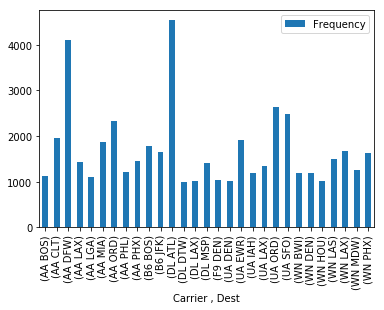

In [16]:
large_delay_df_tmp.set_index(["Pair"],inplace=True)
ax = large_delay_df_tmp.plot(kind='bar')
ax.set_xlabel("Carrier , Dest")

## 6.3

In [ ]:
one_hop = pd.read_sql(sql = "SELECT 1 AS Hops, Carrier, Year, Month, DayofMonth, Origin, Dest, DepTime, MIN(ArrTime) AS ArrTime FROM flights JOIN routes ON IATAICAOAirline = Carrier AND IATAICAODestinationAirport = Dest AND IATAICAOSourceAirport = Origin WHERE Month = 9 AND ArrTime > DepTime GROUP BY Origin, Dest, Year, Month, DayofMonth, DepTime", con = engine)
one_hop =one_hop.dropna(axis=0,how='any')
one_hop

,Hops,Carrier,Year,Month,DayofMonth,Origin,Dest,DepTime,ArrTime
0,1,DL,2016,9,1,ABE,ATL,543.0,737.0
1,1,DL,2016,9,2,ABE,ATL,547.0,751.0
2,1,DL,2016,9,3,ABE,ATL,640.0,846.0
3,1,DL,2016,9,4,ABE,ATL,544.0,735.0
4,1,DL,2016,9,5,ABE,ATL,540.0,725.0
5,1,DL,2016,9,6,ABE,ATL,543.0,735.0
6,1,DL,2016,9,7,ABE,ATL,542.0,725.0
7,1,DL,2016,9,8,ABE,ATL,543.0,729.0
8,1,DL,2016,9,9,ABE,ATL,542.0,729.0
9,1,DL,2016,9,10,ABE,ATL,642.0,848.0


In [ ]:
one_hop.to_sql('shortest', engine, index=False, if_exists='replace')
engine.execute('CREATE index direct ON shortest(Year,Month,DayofMonth,Origin,Dest)')
two_hop = pd.read_sql(sql ="SELECT s1.Year,s1.Month,s1.DayofMonth,s1.Origin, s2.Dest, s1.DepTime, s2.ArrTime as ArrTime, s1.Hops+s2.Hops as Hops FROM shortest S1 JOIN shortest S2 ON S1.DayofMonth = S2.DayofMonth AND S1.Year = S2.Year AND S1.Month = S2.Month AND S1.Dest = S2.Origin WHERE S2.DepTime - S1.ArrTime > 100 AND s2.ArrTime > s1.DepTime AND EXISTS (SELECT 1, S3.ArrTime FROM shortest S3 WHERE S3.DayofMonth = S1.DayofMonth AND S3.DepTime = S1.DepTime AND S2.ArrTime < S3.ArrTime AND S1.Origin = S3.Origin AND S2.Dest = S3.Dest AND S1.Year = S3.Year AND S1.Month = S3.Month)",con=engine)
two_hop

## Step 6.3.1

In [ ]:
two_hop_new = two_hop[(two_hop['Origin'] == 'LAX')  & (two_hop['Dest'] == 'DEN') & (two_hop['DayofMonth']<=8)]
one_hop_new = one_hop[(one_hop['Origin'] == 'LAX')  & (one_hop['Dest'] == 'DEN') & (one_hop['DayofMonth']<=8)]
merge_one_two = one_hop_new.merge(two_hop_new,on=['Year', 'Month', 'DayofMonth','DepTime'])

In [ ]:
merge_one_two

Since we can't find any 2-hop flight satisfying the condition, there is no shorter 2-hop flight.